In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, RegressorMixin, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
import math
import time
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
sns.set_style("whitegrid")

In [2]:
df1 = pd.read_csv("../resources/data/discords/space_shuttle/TEK14.txt",header=None,names=['value'])
df1['anomaly'] = 0

df2 = pd.read_csv("../resources/data/discords/space_shuttle/TEK16.txt",header=None,names=['value'])
df2['anomaly'] = 0

df3 = pd.read_csv("../resources/data/discords/space_shuttle/TEK17.txt",header=None,names=['value'])
df3['anomaly'] = 0
# df = pd.concat([df1,df2,df3],ignore_index=True)

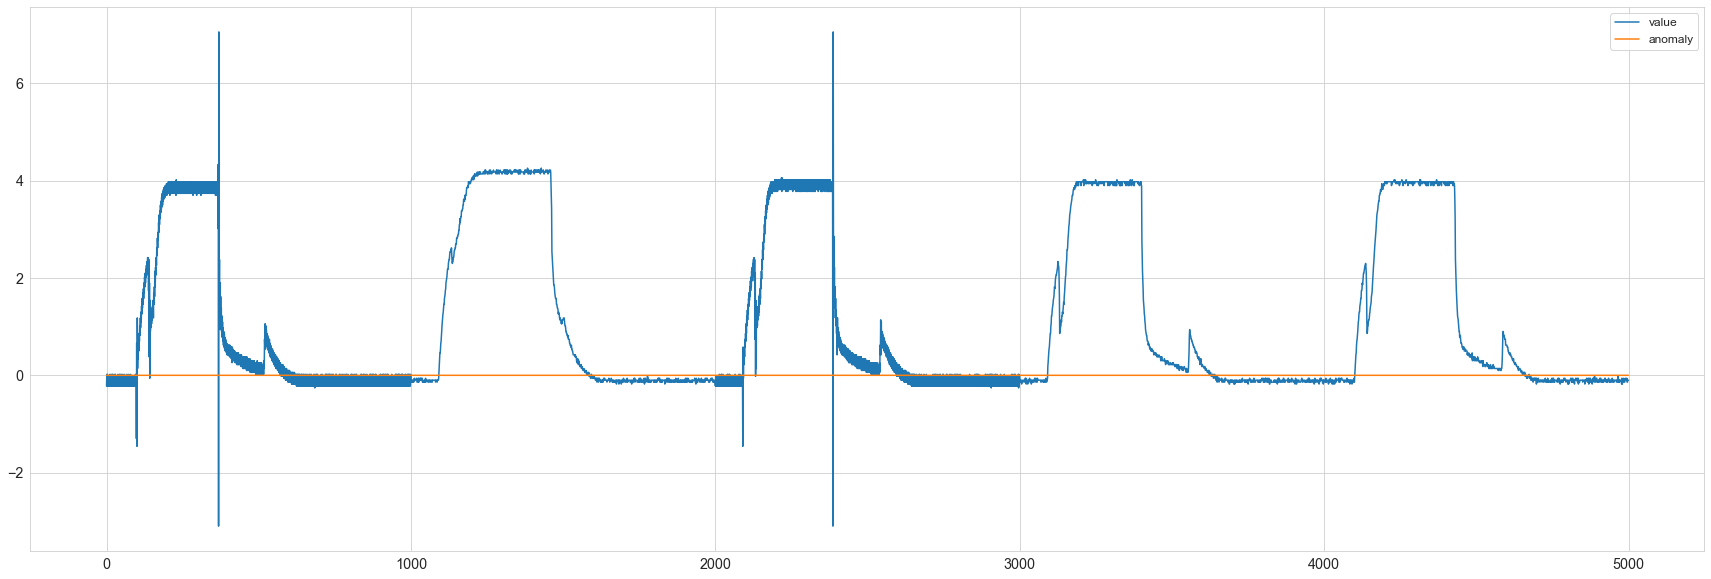

In [3]:
# df1.iloc[1100:1200,1] = 1
# df1.iloc[1455:1955,1] = 1
df1.plot(figsize=(30,10))
plt.show()

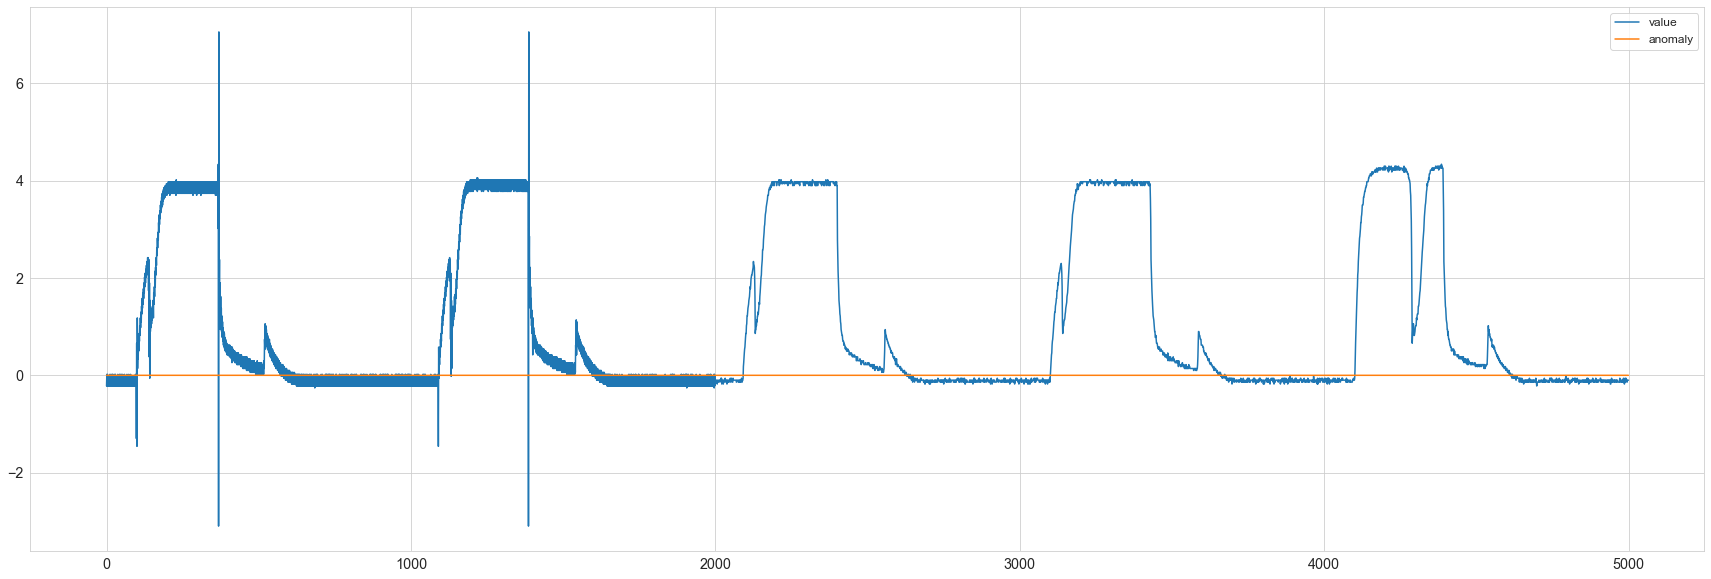

In [4]:
# df2.loc[4270:4370, 'anomaly'] = 1
df2.plot(figsize=(30,10))
plt.show()

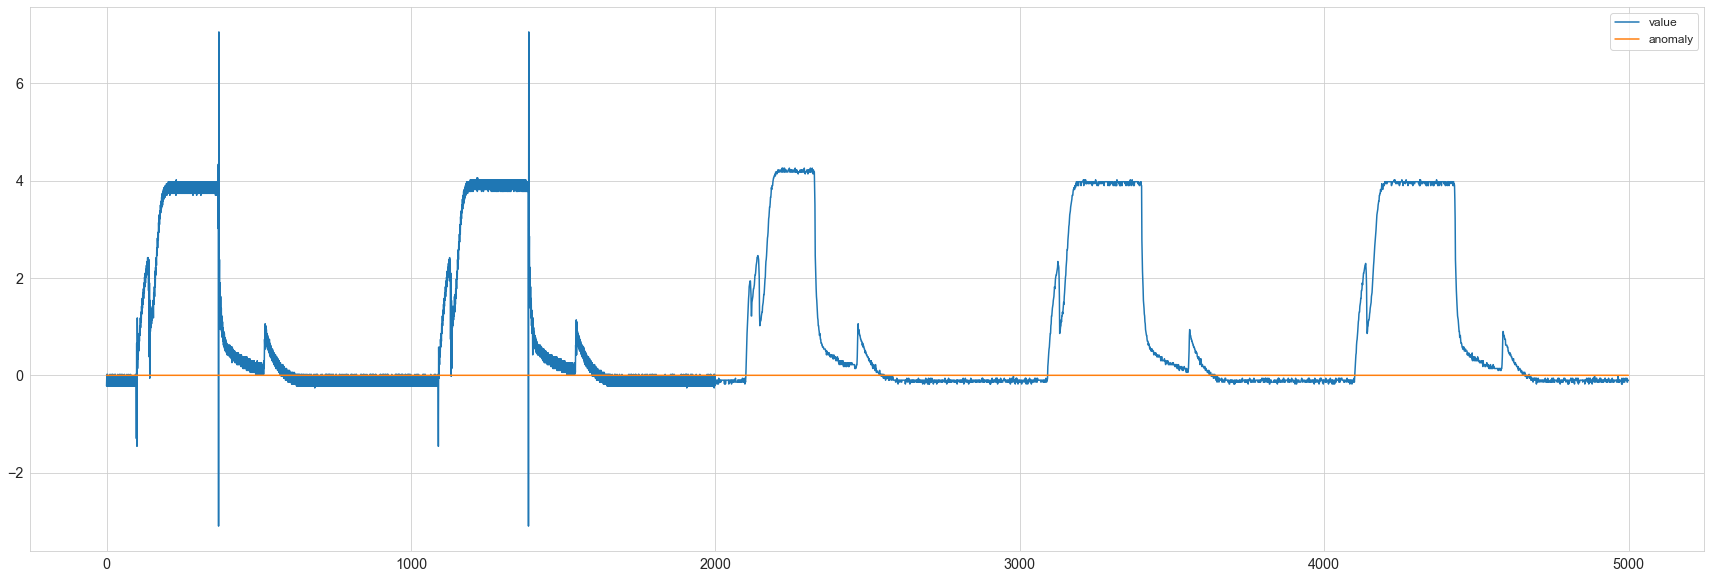

In [5]:
# df3.iloc[2100:2145,1] = 1
df3.plot(figsize=(30,10))
plt.show()

In [6]:
df = pd.concat([df1,df2,df3],ignore_index=True)
df.count()

value      15000
anomaly    15000
dtype: int64

In [7]:
df.tail()

value  anomaly
14995  -0.14        0
14996  -0.14        0
14997  -0.10        0
14998  -0.10        0
14999  -0.10        0

In [8]:
num_values = "num_values: %s"%(df.shape[0])
print(num_values)

num_values: 15000


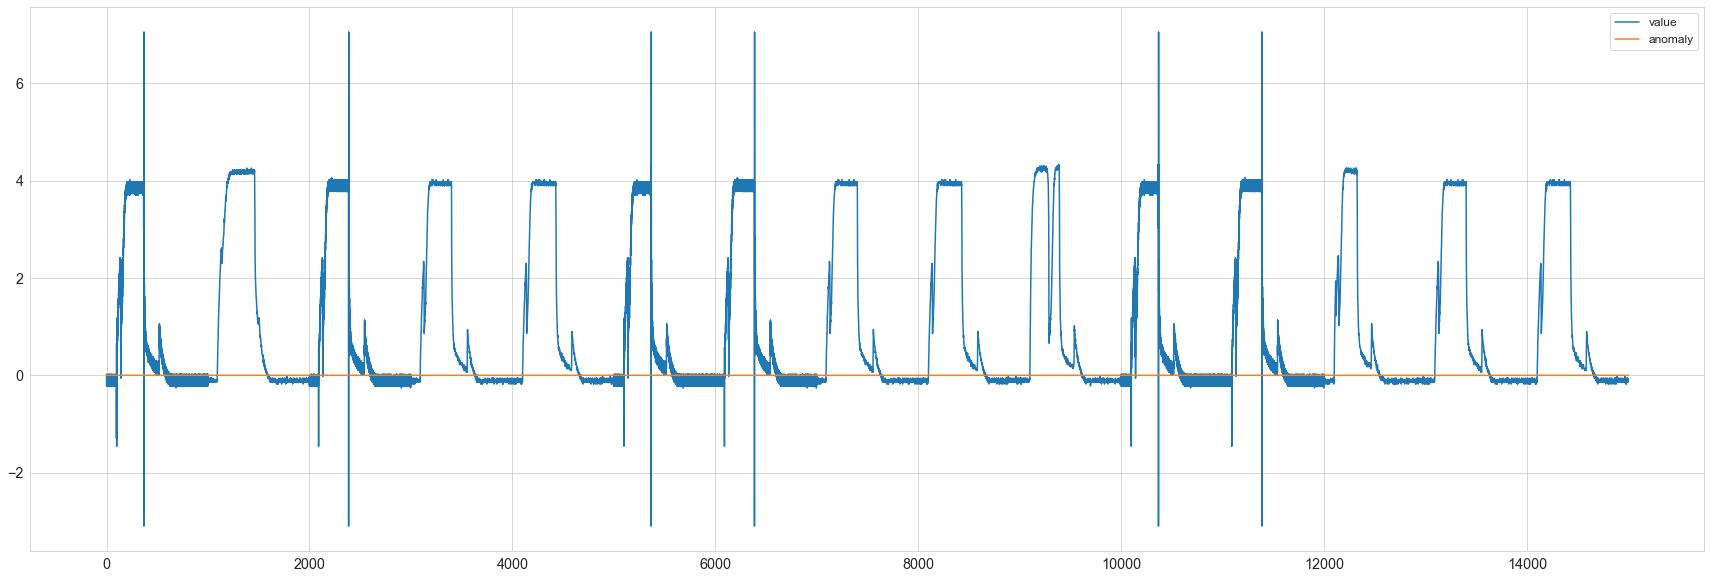

In [9]:
df.plot(figsize=(30,10))
plt.show()

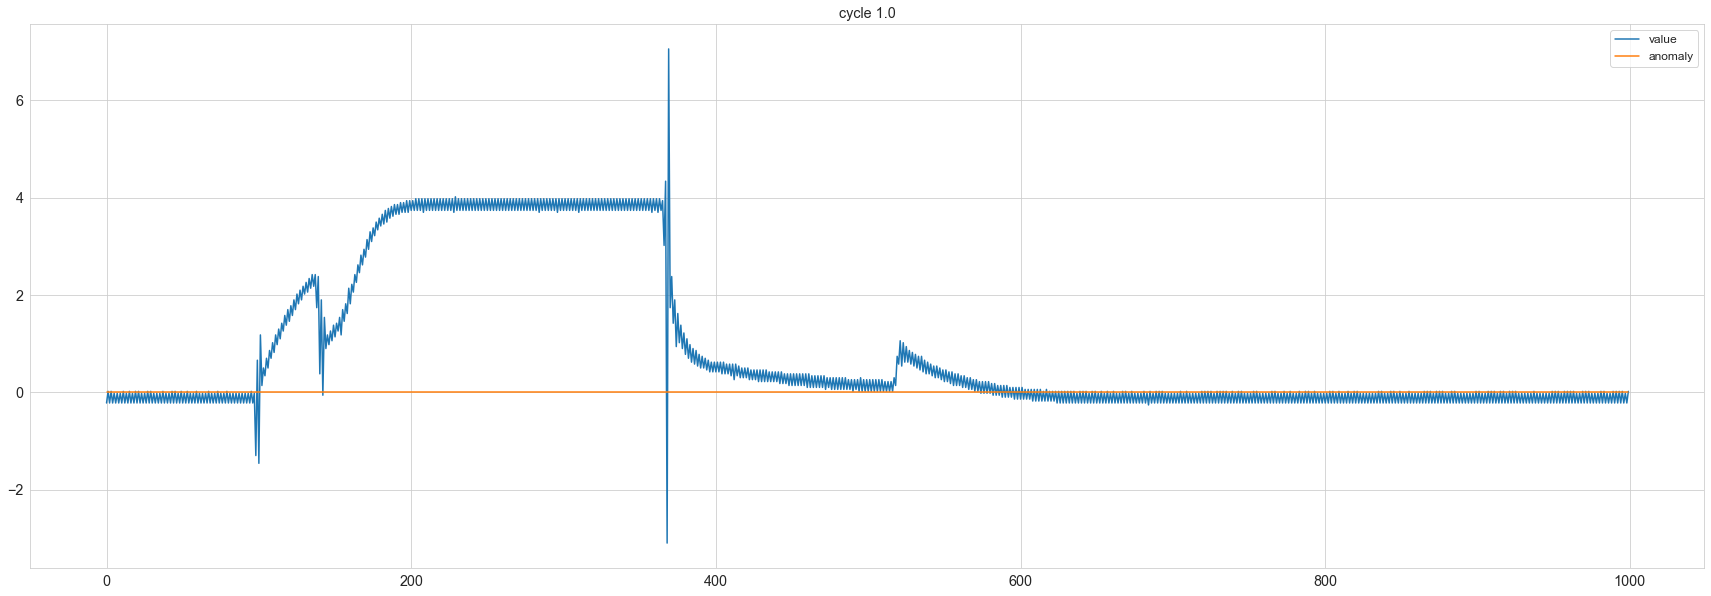

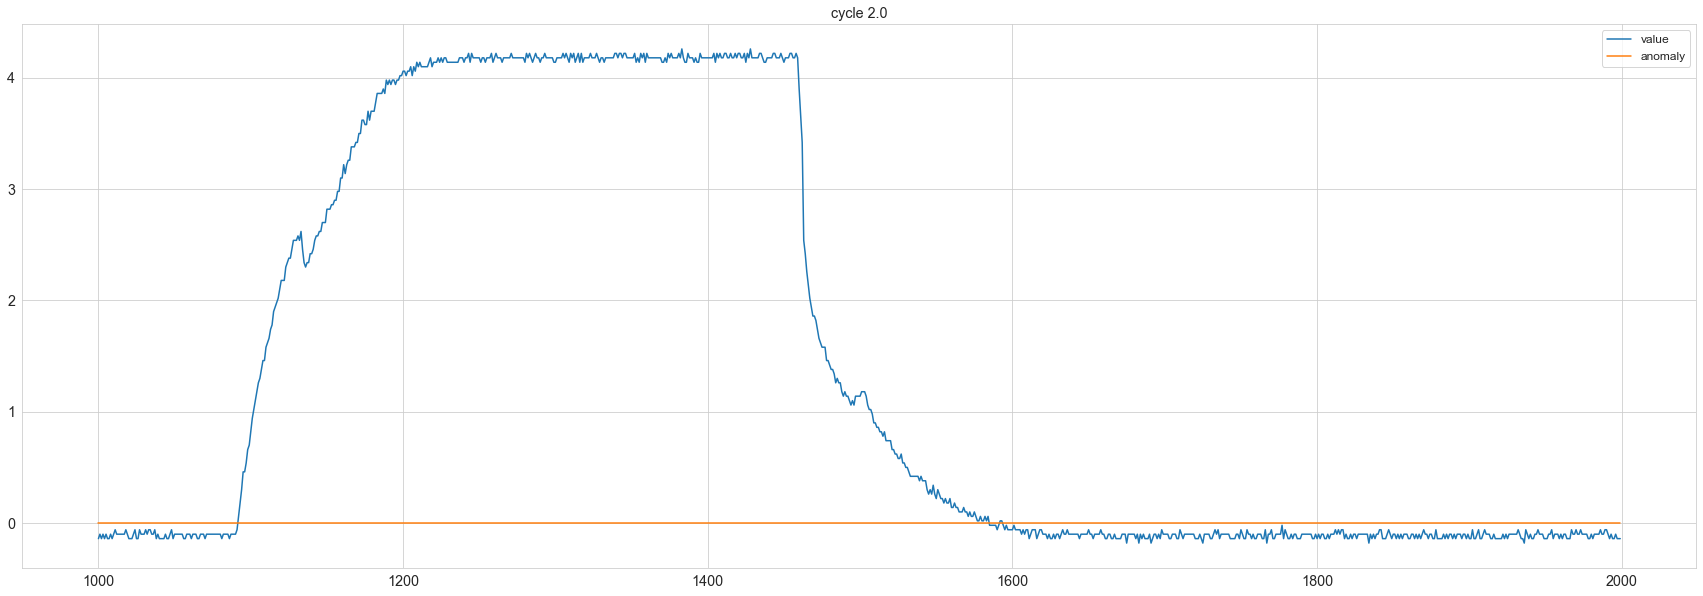

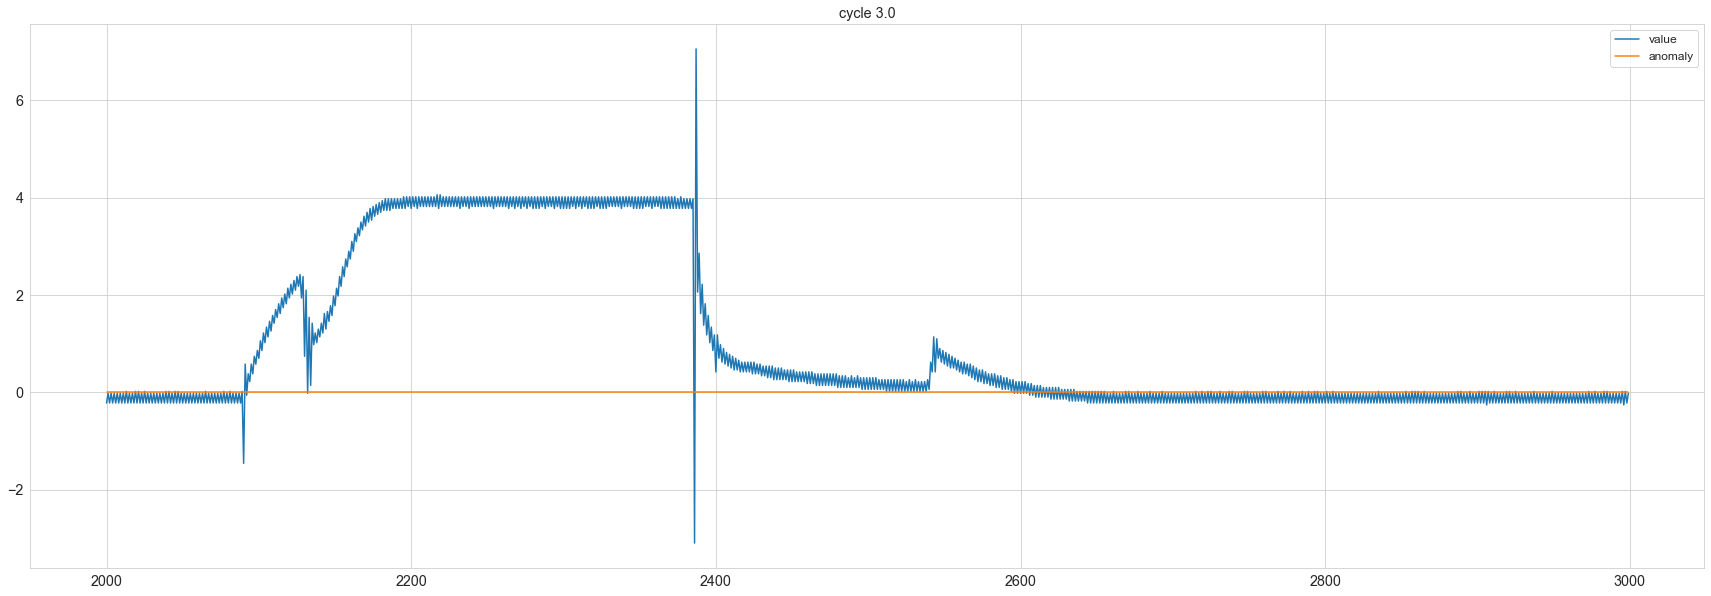

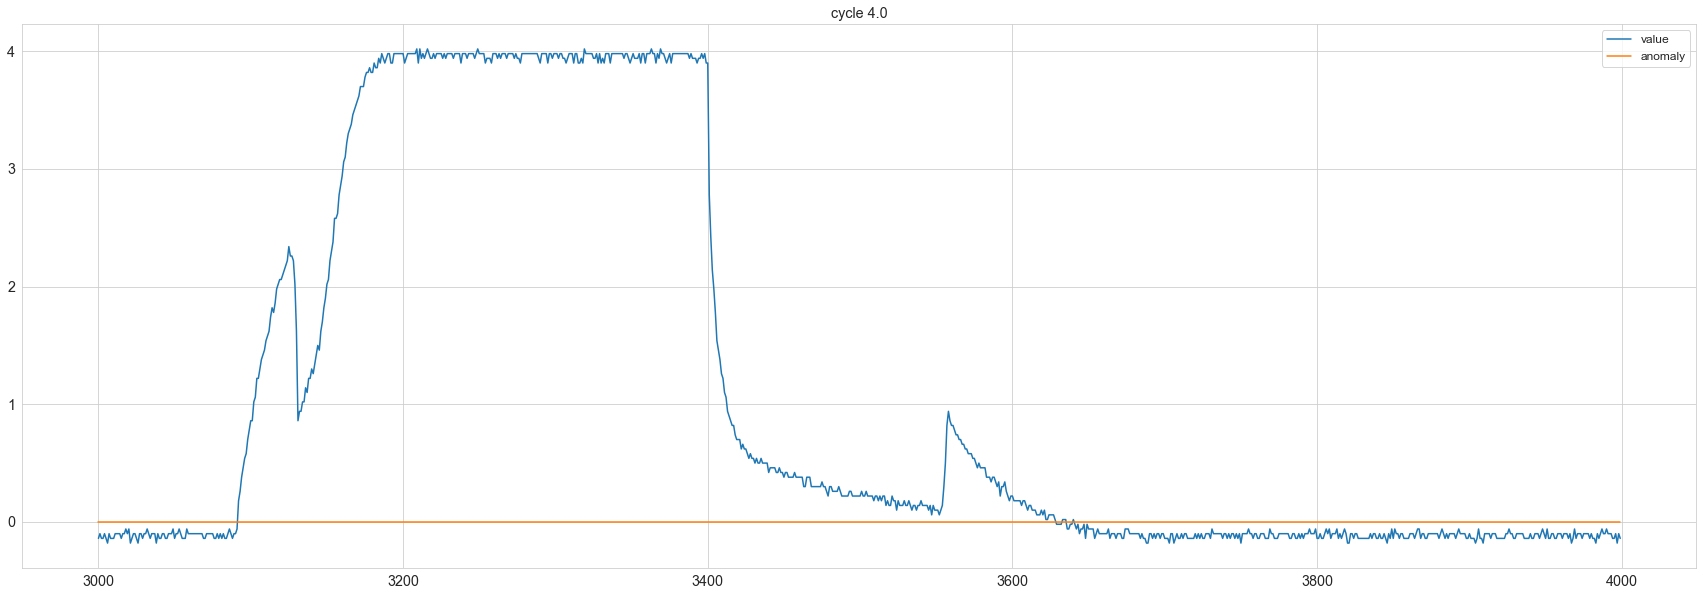

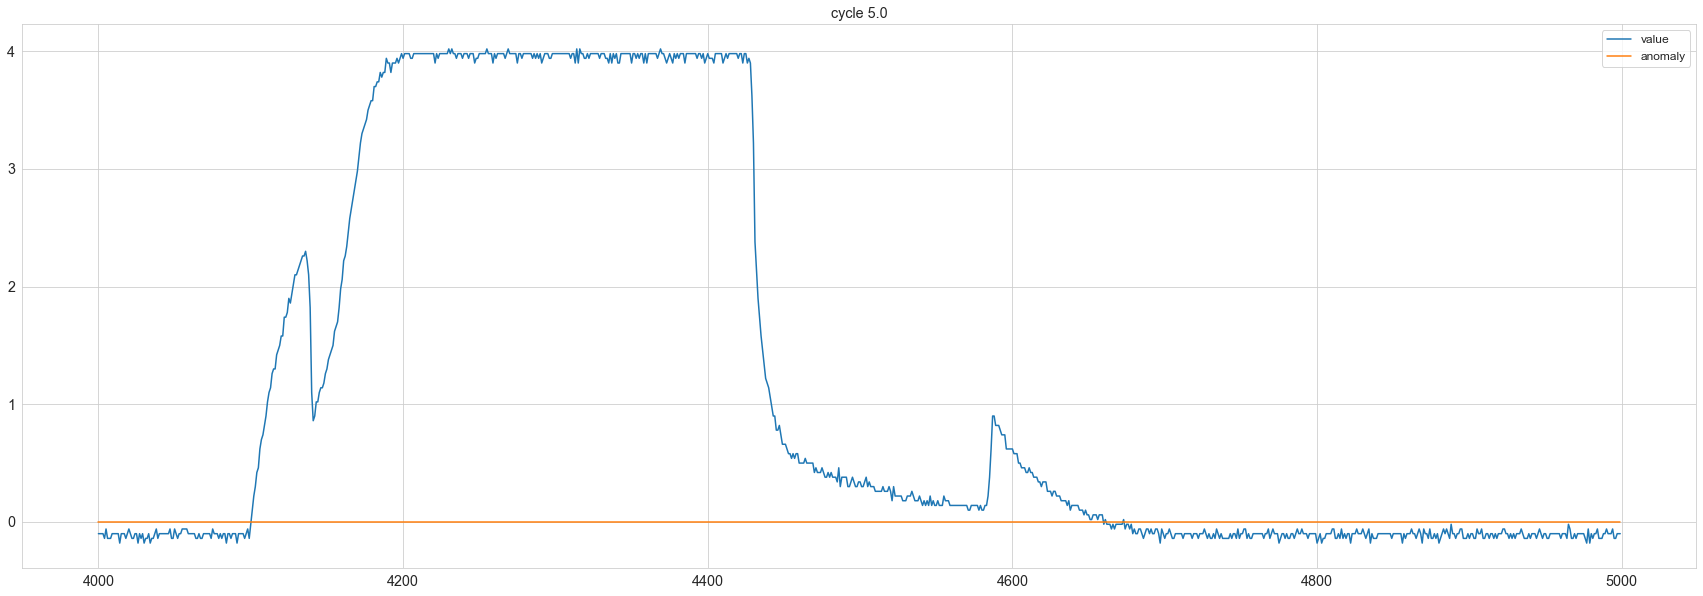

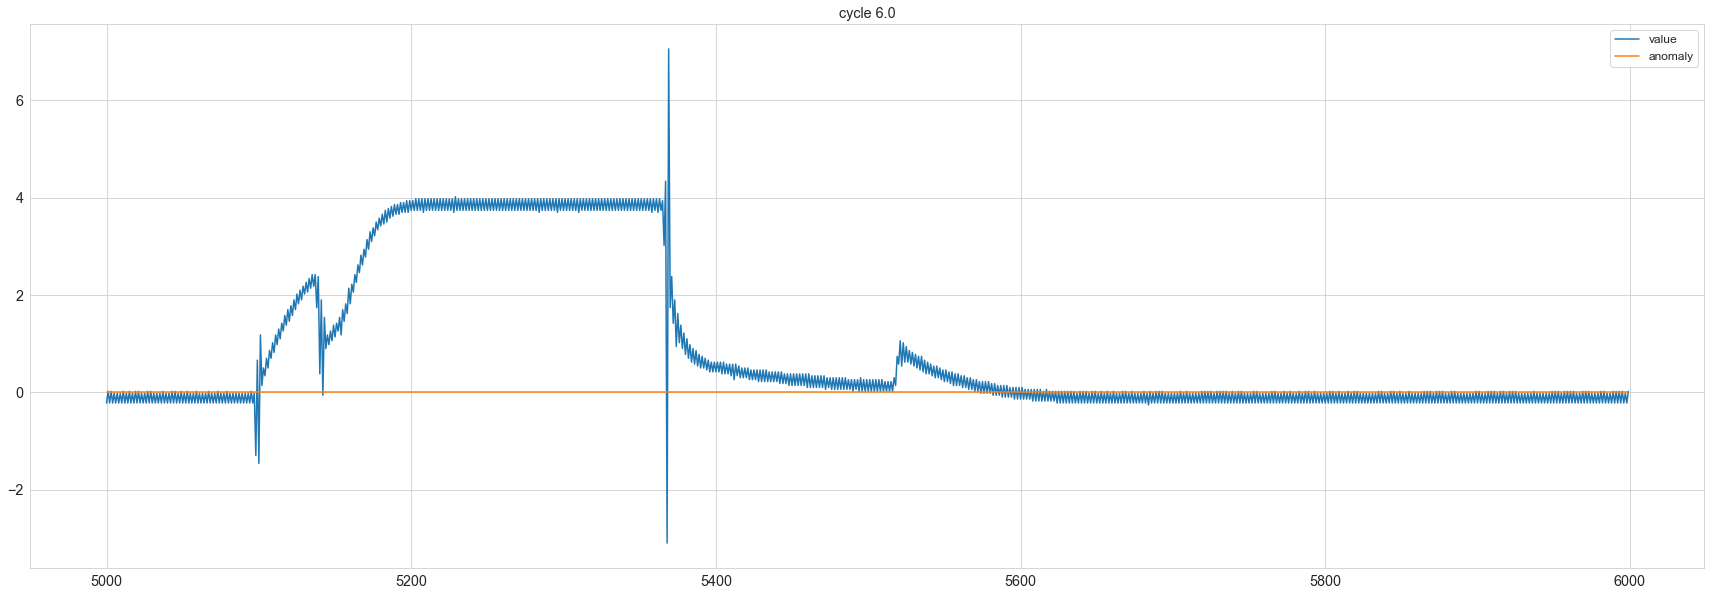

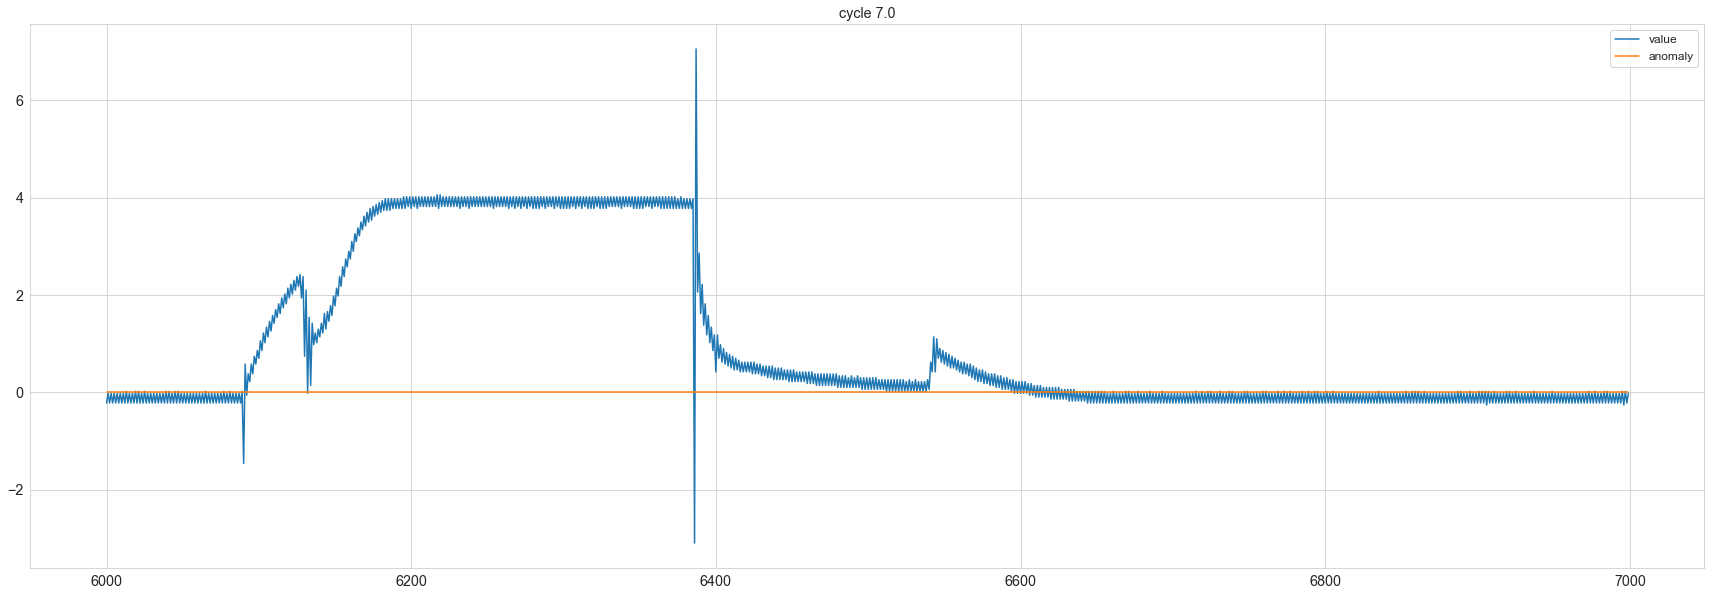

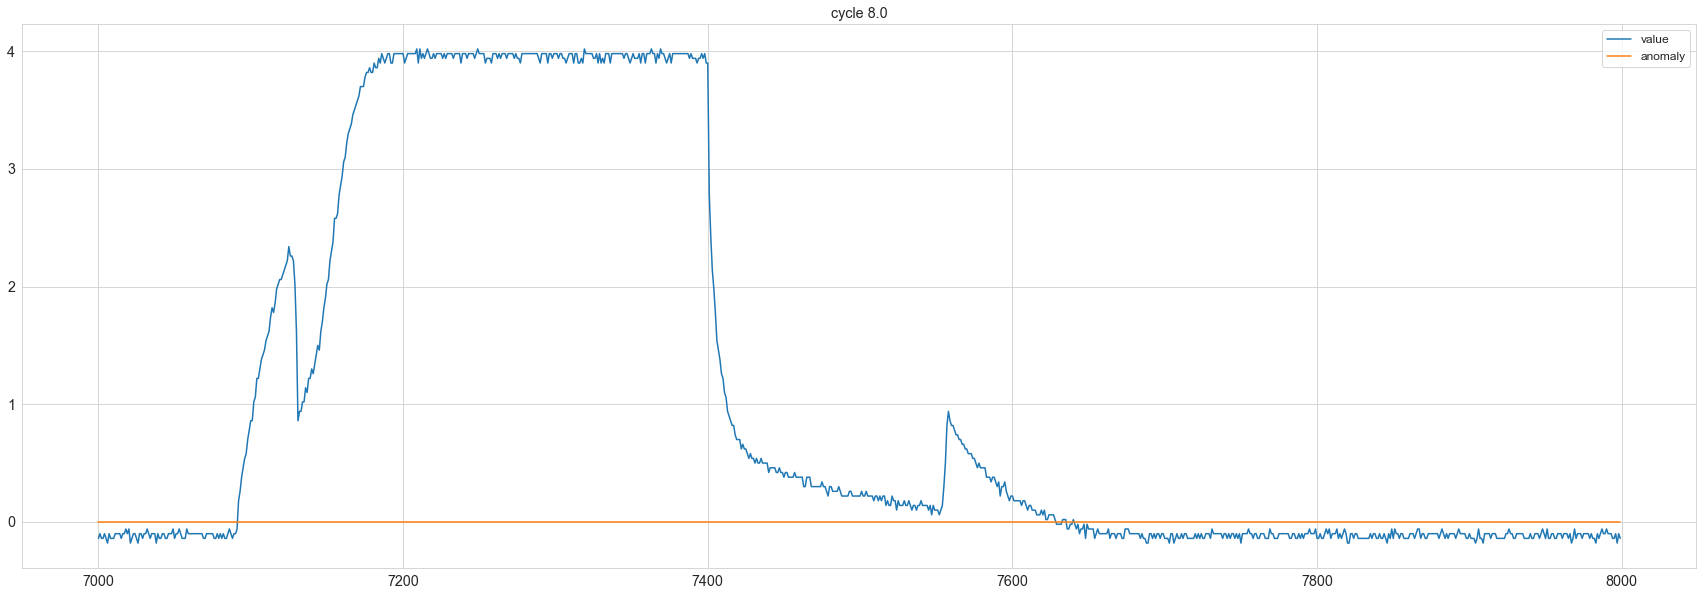

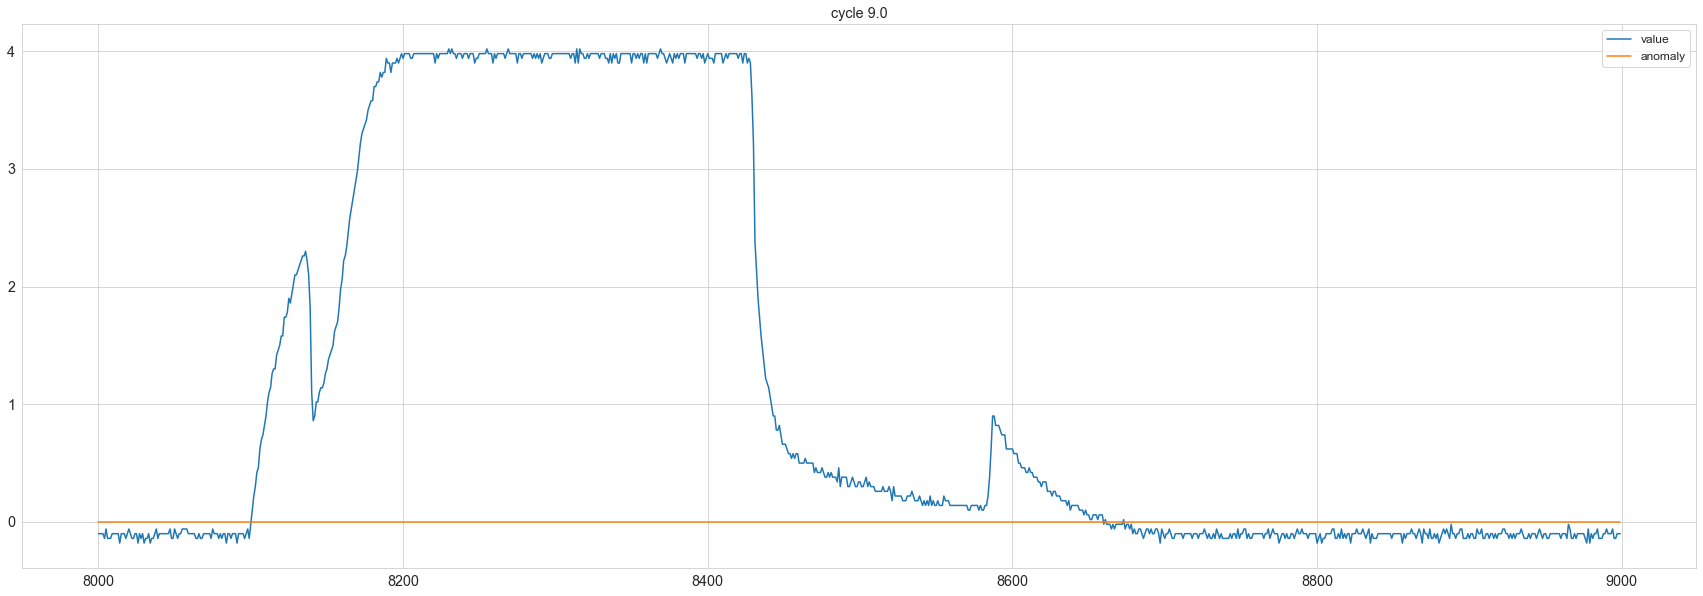

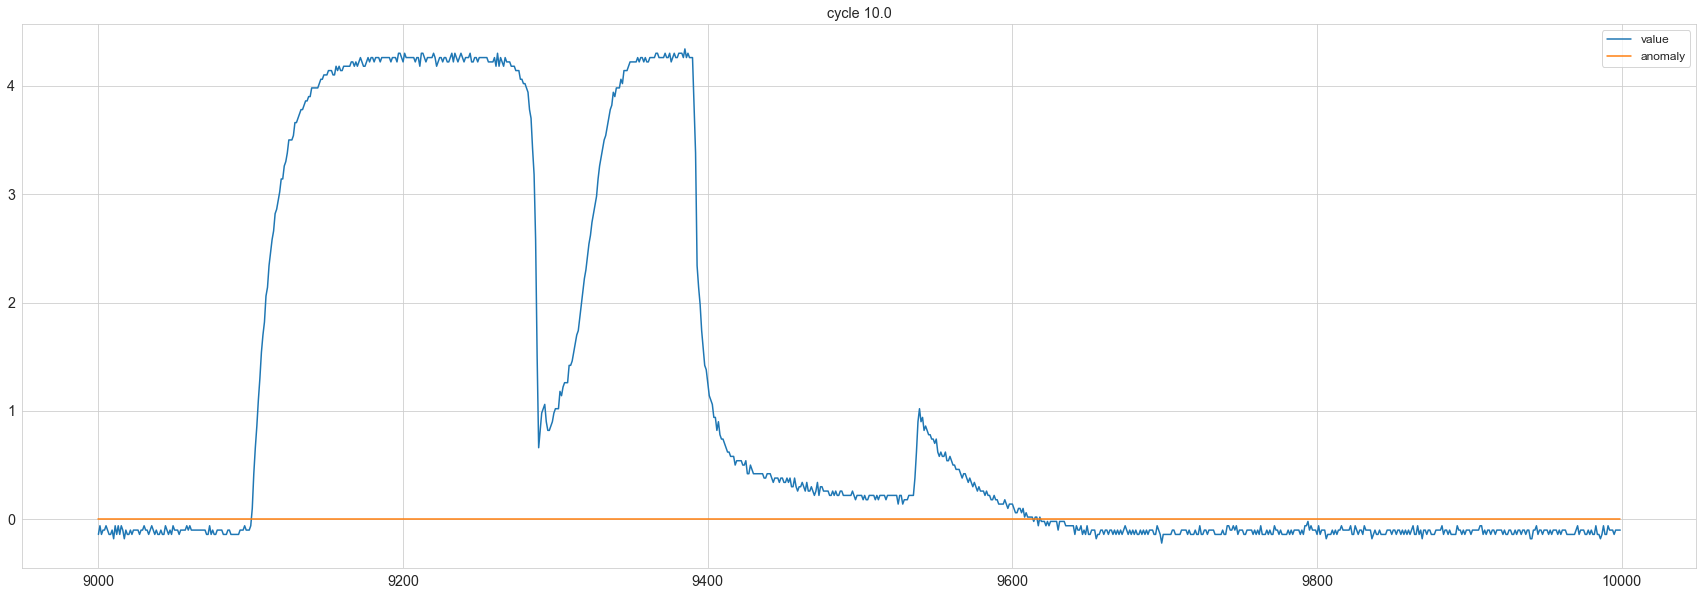

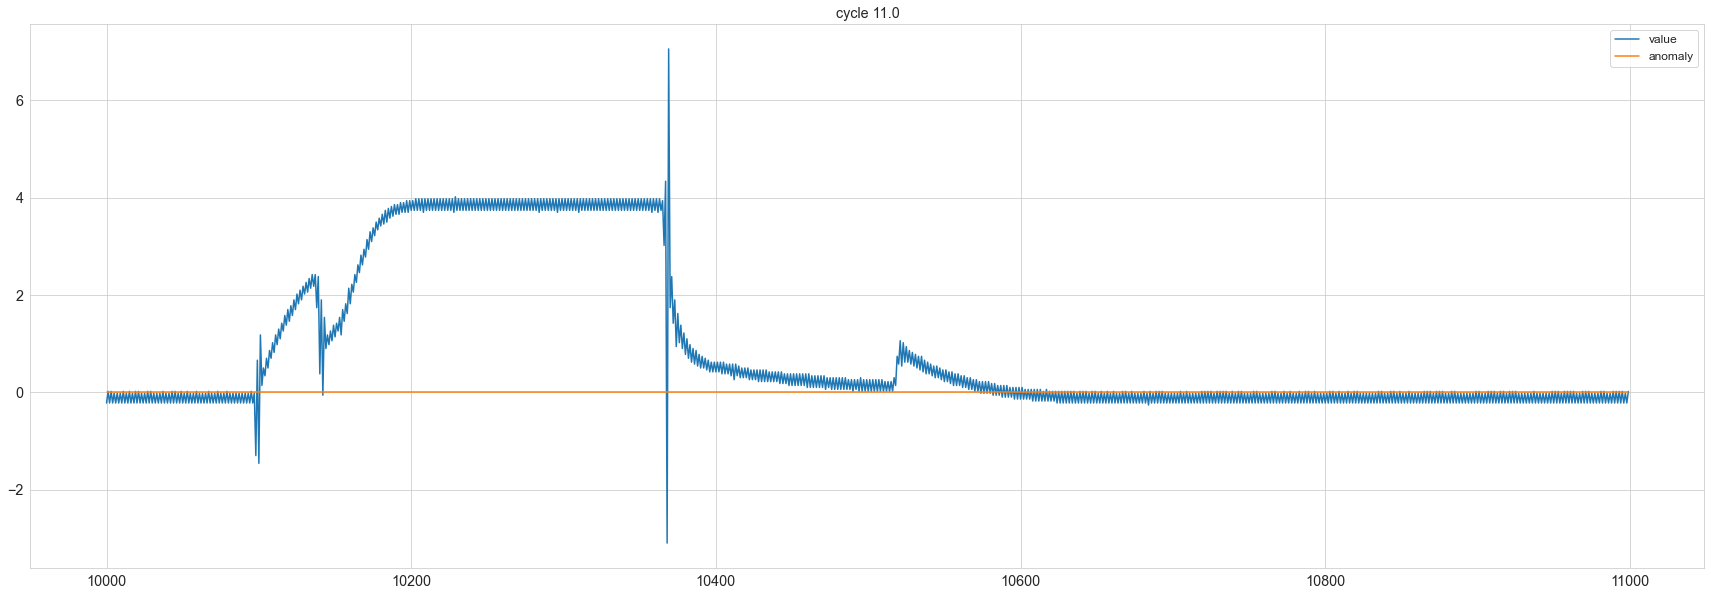

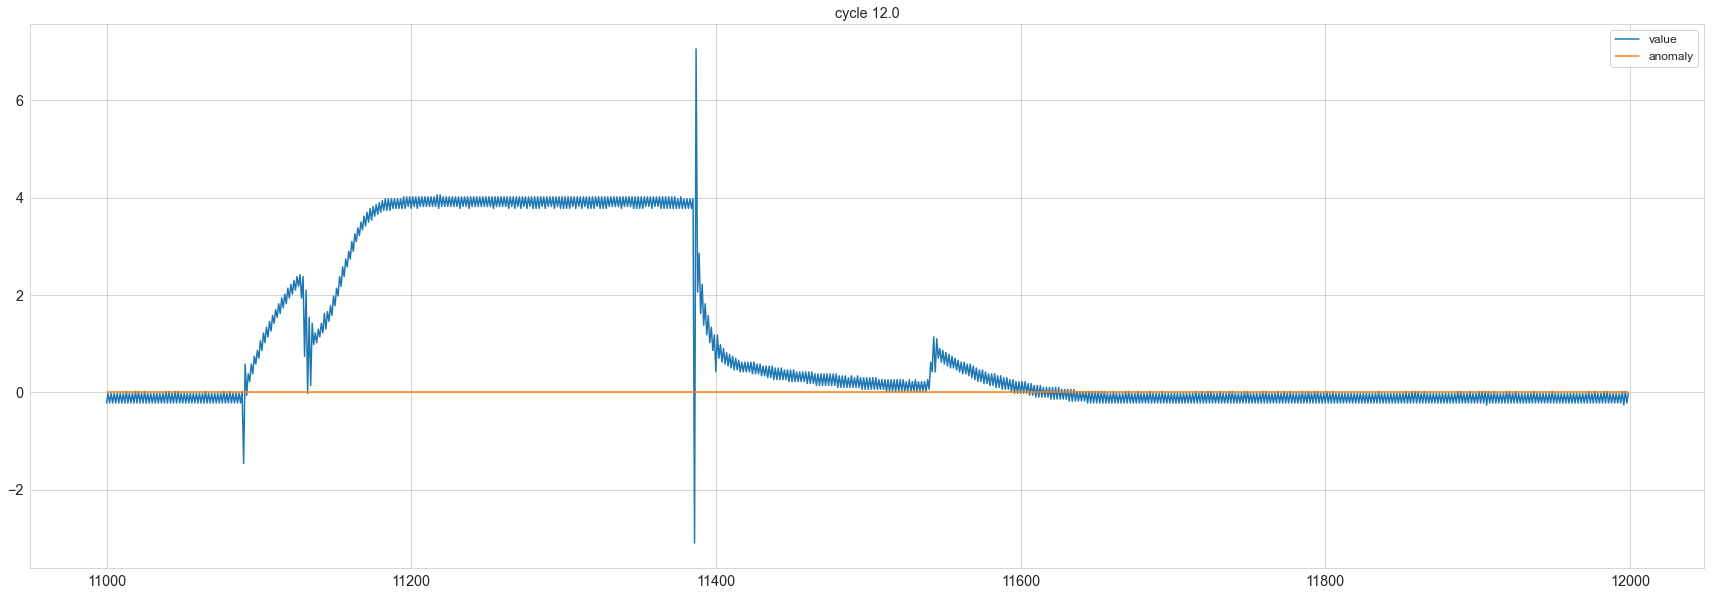

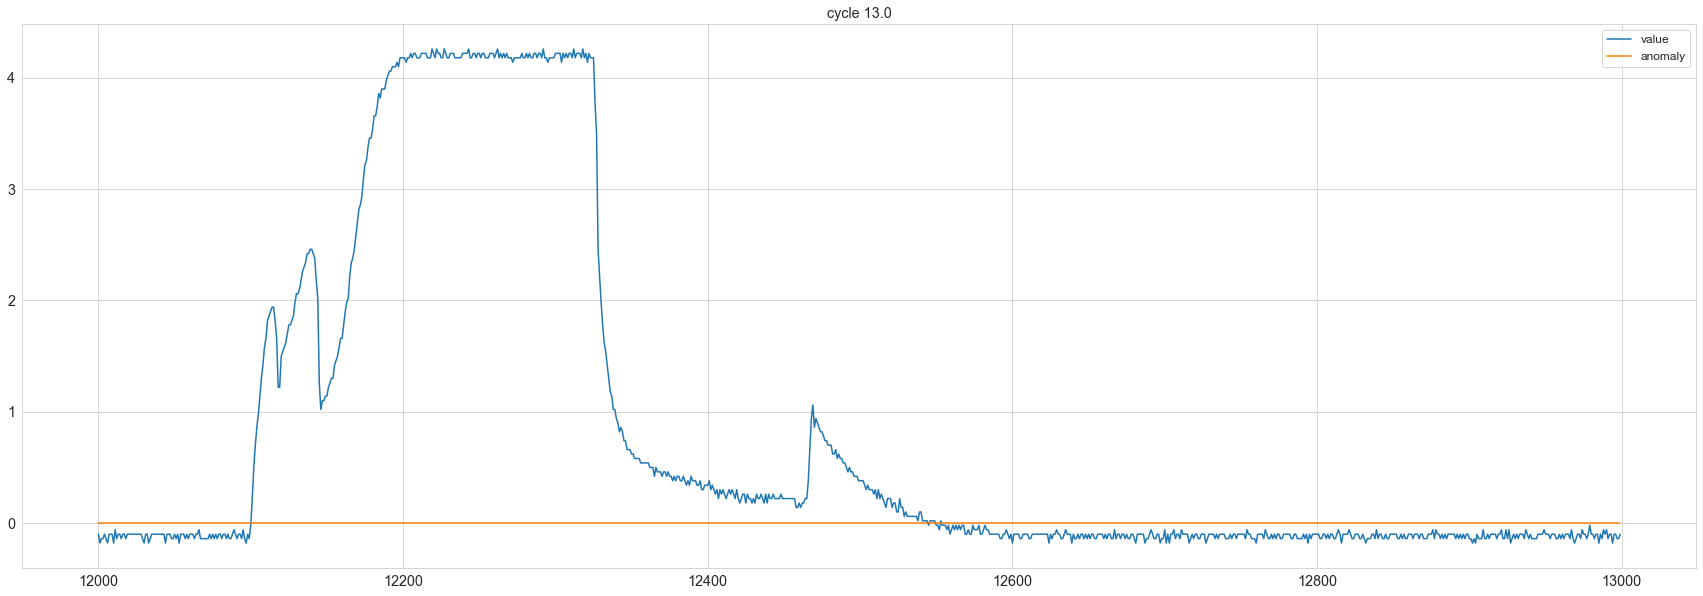

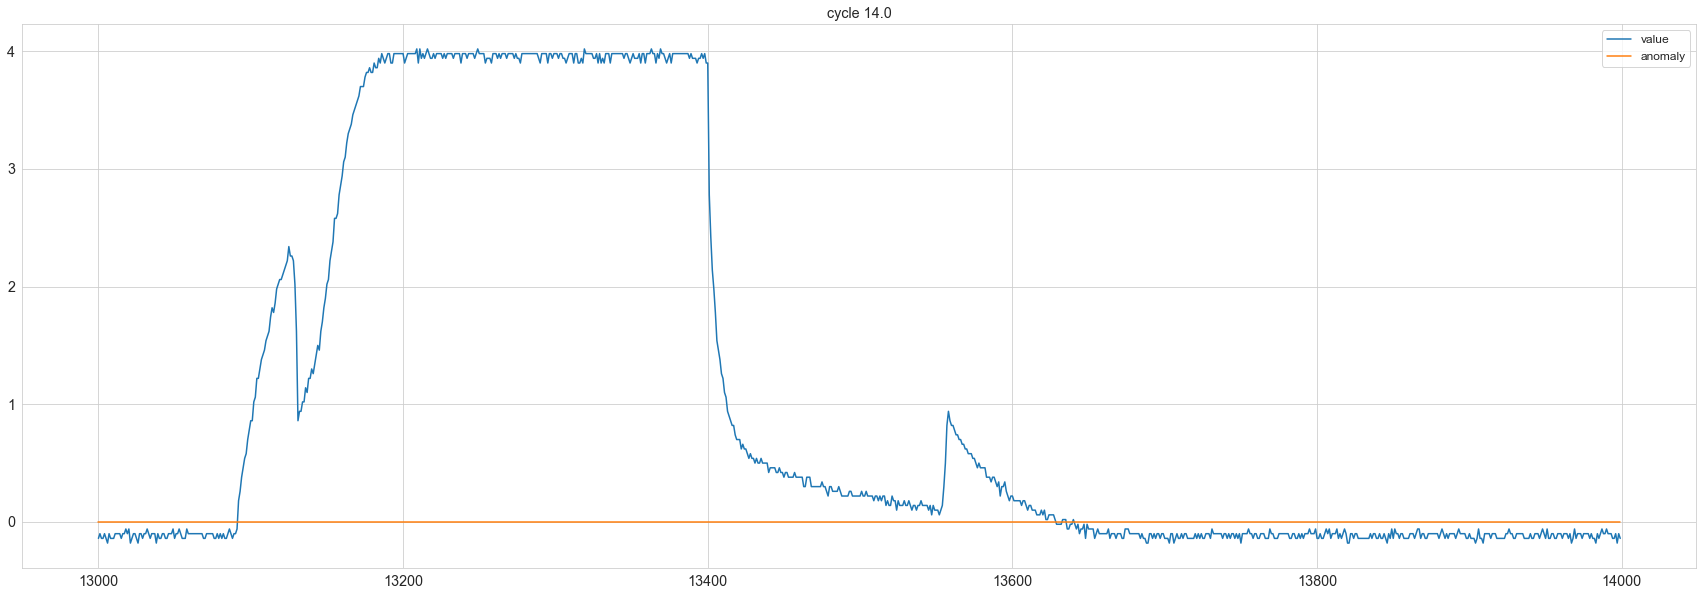

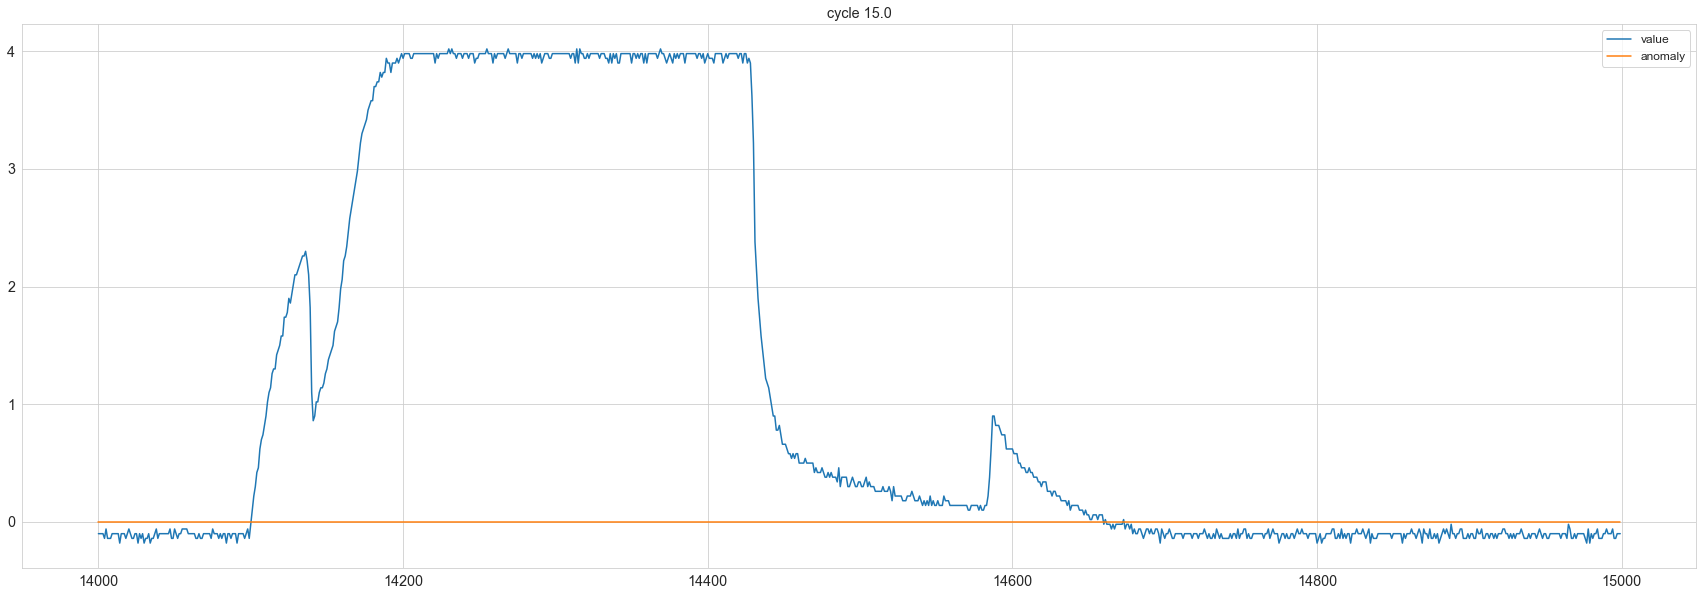

In [10]:
#iterate over a week. a week will have 672 values
step = 1000
for i in range(0,df.shape[0],step):
    df[i:i+step].plot(figsize=(30,10))
    plt.title("cycle %s"%(i/step +1))
    plt.show()
    

In [11]:
df

value  anomaly
0      -0.22        0
1       0.02        0
2      -0.22        0
3       0.02        0
4      -0.22        0
...      ...      ...
14995  -0.14        0
14996  -0.14        0
14997  -0.10        0
14998  -0.10        0
14999  -0.10        0

[15000 rows x 2 columns]

In [12]:
# EXTREME_VALUE_CYCLES = [1,3,6,7,11,12]
# step = 1000
# template_circle = df[13000:14000]
# for i in range(0,df.shape[0],step):
#     cycle = i/step +1
#     print('cycle:',cycle)
#     print('i:',i)
#     if cycle in EXTREME_VALUE_CYCLES:
#         print('Ping')
#         sample_circle = df[i:i+step]
#         column = sample_circle["value"]
#         for index in range(step):
#             df.iloc[i+index,0] = template_circle.iloc[index,0]
#         sample_circle = df[i:i+step]
#         column = sample_circle["value"]
#         column.plot(figsize=(30,10))
#         plt.title("cycle %s"%(cycle))
#         print('max: {0}, min: {1}'.format(column.max(),column.min()))
#         plt.show()


In [13]:
EXTREME_VALUE_CYCLES = [1,3,6,7,11,12]
anomaly_cycles = [2,10,13]
test_cycles = [8,9,14,15]
sub_test_cycles = [10] 

validation2_cycles = [2,8,9,14,15] 
sub_validation2_cycles = [13] 

train_cycles = [8,9,14,15]
validation1_cycles = [14,15]

df_train_list = []
df_valid1_list = []
df_valid2_list = []
df_test_list = []
step = 1000
for i in range(0,df.shape[0],step):
    cycle = i/step +1
    if cycle in train_cycles:
        for _ in range(8):
            df_train_list.append(df[i:i+step])
        
    if cycle in validation1_cycles:
        df_valid1_list.append(df[i:i+step])
        
    if cycle in validation2_cycles:
        if cycle in anomaly_cycles:
            df[i:i+step]['anomaly'] =1
        df_valid2_list.append(df[i:i+step])
        
    if cycle in test_cycles:
        if cycle in anomaly_cycles:
            df[i:i+step]['anomaly'] =1
        df_test_list.append(df[i:i+step])

############
for i in range(0,df.shape[0],step):
    cycle = i/step +1
        
    if cycle in sub_validation2_cycles:
        if cycle in anomaly_cycles:
            df[i:i+step]['anomaly'] =1
        df_valid2_list.append(df[i:i+step])
        
    if cycle in sub_test_cycles:
        if cycle in anomaly_cycles:
            df[i:i+step]['anomaly'] =1
        df_test_list.append(df[i:i+step])

print(len(df_train_list))
print(len(df_valid1_list))
print(len(df_valid2_list))
print(len(df_test_list))
   

32
2
6
5
/Users/tranlonghoai/Desktop/lstm_anomaly_thesis-master/venv/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/tranlonghoai/Desktop/lstm_anomaly_thesis-master/venv/lib/python3.7/site-packages/ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/tranlonghoai/Desktop/lstm_anomaly_thesis-master/venv/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [14]:
# step = 64
# EXTREME_VALUE_CYCLES = [1,3,6,7,11,12]
# anomaly_cycles = [2,10,13]
# validation1_cycles =np.arange(196,235).tolist()
# validation2_cycles = np.arange(10,32).tolist()
# test_cycles = np.arange(140,195).tolist()
# # train_cycles = [8,9,14,15]

# # step = 500
# # EXTREME_VALUE_CYCLES = [1,2,5,6,11,12,13,14,21,22,23,24]
# # anomaly_cycles = [1,2,3,4,5,6,11,12,13,14,19,20,21,22,23,24,25,26]
# # validation2_cycles = [3,4,7,8,9,10,19,20,25,26]
# # test_cycles = [3,4,7,8,9,10,19,20,25,26]
# # train_cycles = [15,16,17,18,27,28,29,30]
# # step = 250
# # EXTREME_VALUE_CYCLES = [1, 2, 3, 4, 9, 10, 11, 12, 21, 22, 23, 24, 25, 26, 27, 28, 41, 42, 43, 44, 45, 46, 47, 48]
# # anomaly_cycles = [1,2,3,4,5,9,10,11,12,21,22,23,24,25,26,27,28,37,38,41,42,43,44,45,46,47,48,49]
# # validation2_cycles = [5, 6, 7, 8, 13, 14, 15, 16, 17, 18, 19, 20, 37, 38, 39, 40, 49, 50, 51, 52]
# # test_cycles = [5, 6, 7, 8, 13, 14, 15, 16, 17, 18, 19, 20, 37, 38, 39, 40, 49, 50, 51, 52]
# # train_cycles = [29, 30, 31, 32, 33, 34, 35, 36, 53, 54, 55, 56, 57, 58, 59, 60]
# # validation1_cycles = [29, 30, 31, 32, 33, 34, 35, 36]

# df_train_list = []
# df_valid1_list = []
# df_valid2_list = []
# df_test_list = []
# for i in range(0,df.shape[0],step):
#     cycle = i/step +1
#     # if cycle in train_cycles:
#     #     df_train_list.append(df[i:i+step])
#         # for _ in range(8):
#         #     df_train_list.append(df[i:i+step])
        
#     if cycle in validation1_cycles:
#         df_valid1_list.append(df[i:i+step])
        
#     elif cycle in validation2_cycles:
#         # if cycle in anomaly_cycles:
#         #     df[i:i+step]['anomaly'] =1
#         df_valid2_list.append(df[i:i+step])
        
#     elif cycle in test_cycles:
#         # if cycle in anomaly_cycles:
#         #     df[i:i+step]['anomaly'] =1
#         df_test_list.append(df[i:i+step])

#     else:
#         df_train_list.append(df[i:i+step])

# # for _ in range(5):
# #     for i in range(0,df.shape[0],step):
# #         cycle = i/step +1
# #         if cycle in train_cycles:
# #             df_train_list.append(df[i:i+step])


# print(len(df_train_list))
# print(len(df_valid1_list))
# print(len(df_valid2_list))
# print(len(df_test_list))
   

In [15]:
# df_train = pd.concat(df_train_list,ignore_index=True)
df_train = pd.concat(df_train_list,ignore_index=True)
df_test = pd.concat(df_test_list,ignore_index=True)
df_validation1 = pd.concat(df_valid1_list,ignore_index=True)
df_validation2 = pd.concat(df_valid2_list,ignore_index=True)
df_dict = {}
df_dict['train'] = df_train
df_dict['test'] = df_test
df_dict['validation1'] = df_validation1
df_dict['validation2'] = df_validation2

In [16]:
df_dict['test']

value  anomaly
0     -0.14        0
1     -0.10        0
2     -0.14        0
3     -0.14        0
4     -0.10        0
...     ...      ...
4995  -0.14        1
4996  -0.10        1
4997  -0.10        1
4998  -0.10        1
4999  -0.10        1

[5000 rows x 2 columns]

In [17]:
# plt.figure()
# df['value'].plot(figsize=(15,5))
# rows = df[df.anomaly.isin([1])].itertuples()
# for row in rows:
#     plt.plot(row[0], row[1], 'r.', markersize=5.0)
# plt.show()

Size of train: 32000
Size of test: 5000
Size of validation1: 2000
Size of validation2: 6000
Total: 45000
Ratio of train: 0.711111
Ratio of test: 0.111111
Ratio of validation1: 0.044444
Ratio of validation2: 0.133333


<Figure size 1080x360 with 0 Axes>

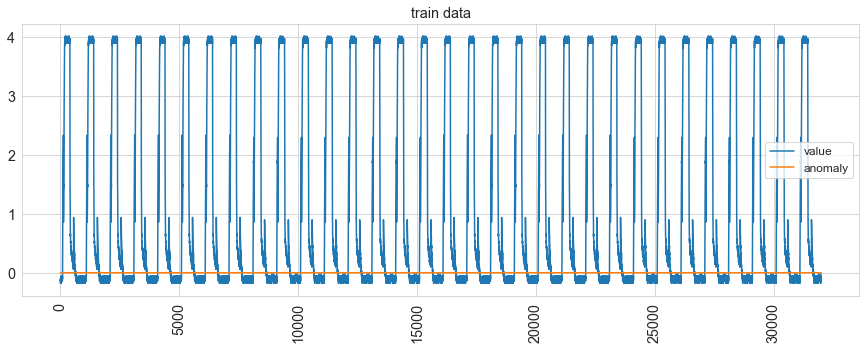

<Figure size 1080x360 with 0 Axes>

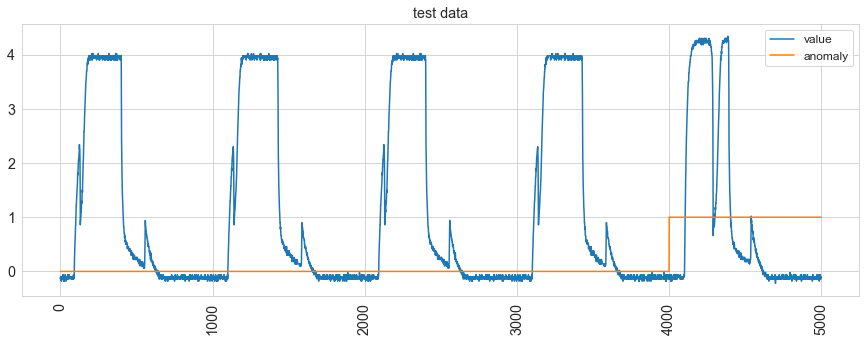

<Figure size 1080x360 with 0 Axes>

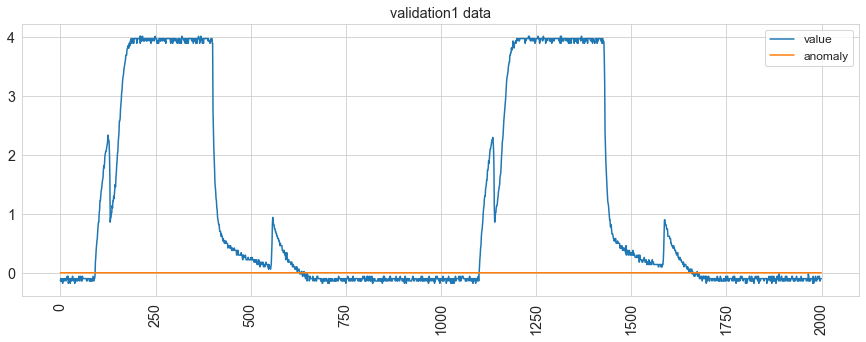

<Figure size 1080x360 with 0 Axes>

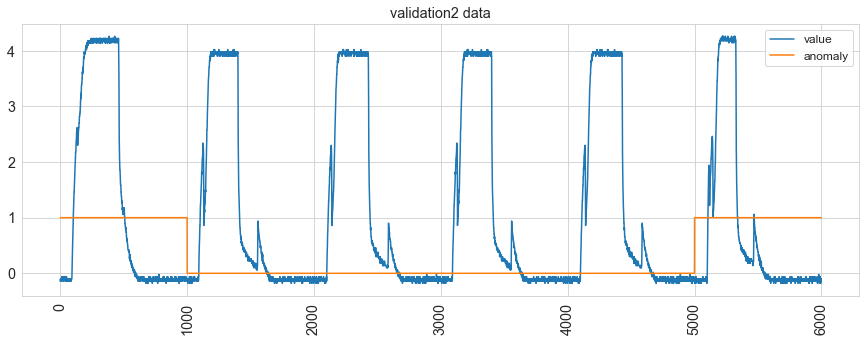

In [18]:
count = 0
for key in df_dict:
    print("Size of %s: %d"%(key,df_dict[key].shape[0]))
    count += df_dict[key].shape[0]
print("Total: %d"%(count))

for key in df_dict:
    print("Ratio of %s: %f"%(key,float(df_dict[key].shape[0])/count))

for key in df_dict:
    plt.figure()
    df_tmp = df_dict[key]
    # df_tmp['value'].plot(figsize=(15,5))
    df_tmp.plot(figsize=(15,5))
    rows = df_tmp[df_tmp.anomaly.isin([1])].itertuples()
#     for row in rows:
#         plt.plot(row[0], row[1], 'r.', markersize=5.0)
    plt.xticks(rotation='vertical')
    plt.title("%s data"%(key))
    plt.show()

In [19]:
for key in df_dict:
    np.save("../resources/data/discords/space_shuttle/%s"%(key),df_dict[key])

In [20]:
#Detection code starts here
#Detection code starts here
#Detection code starts here
#Detection code starts here

In [21]:
data_folder = "../resources/data/discords/space_shuttle/"

In [22]:
import numpy as np
#load training data
train_predictions = np.load(data_folder+"train_predictions.npy")
train_true = np.load(data_folder+"train_true.npy")
print(train_predictions.shape)
print(train_true.shape)

(31968, 1)
(31968,)


In [23]:
#load validation2 data
validation2_predictions = np.load(data_folder+"validation2_predictions.npy")
validation2_true = np.load(data_folder+"validation2_true.npy")
validation2_labels = np.load(data_folder+"validation2_labels.npy")
print(np.shape(validation2_predictions))
print(np.shape(validation2_true))
print(np.shape(validation2_labels))
validation2_labels = np.reshape(validation2_labels,[len(validation2_labels),np.shape(validation2_labels)[1]])
print(np.shape(validation2_labels))

(5994, 1)
(5994,)
(5998, 1, 1)
(5998, 1)


In [24]:
# load test data
test_predictions = np.load(data_folder+"test_predictions.npy")
test_true = np.load(data_folder+"test_true.npy")
test_labels = np.load(data_folder+"test_labels.npy")
print(np.shape(test_predictions))
print(np.shape(test_true))
test_labels = np.reshape(test_labels,[len(test_labels),np.shape(test_labels)[1]])
print(np.shape(test_labels))

(4995, 1)
(4995,)
(4998, 1)


In [25]:
# load test data
test_predictions = np.load(data_folder+"test_predictions.npy")
test_true = np.load(data_folder+"test_true.npy")
test_labels = np.load(data_folder+"test_labels.npy")
print(np.shape(test_predictions))
print(np.shape(test_true))
test_labels = np.reshape(test_labels,[len(test_labels),np.shape(test_labels)[1]])
print(np.shape(test_labels))

(4995, 1)
(4995,)
(4998, 1)


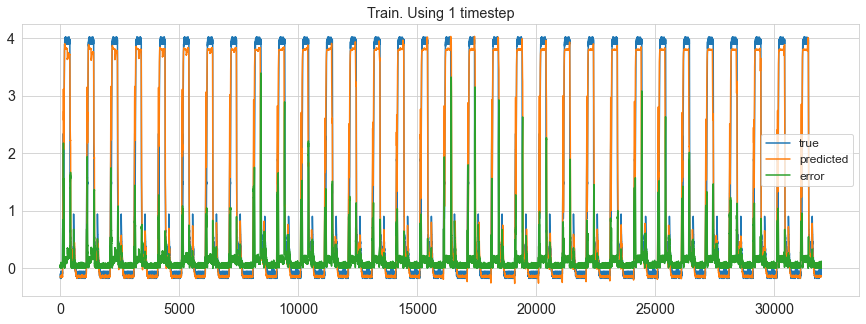

In [26]:
plt.figure(figsize=(15,5))
plt.plot(train_true,label='true')
plt.plot(train_predictions[:,0],label='predicted')
plt.plot(abs(train_true - train_predictions[:,0]),label='error')
plt.legend()
plt.title("Train. Using 1 timestep")
plt.show()

[0.03041813]
0.13121171712630397


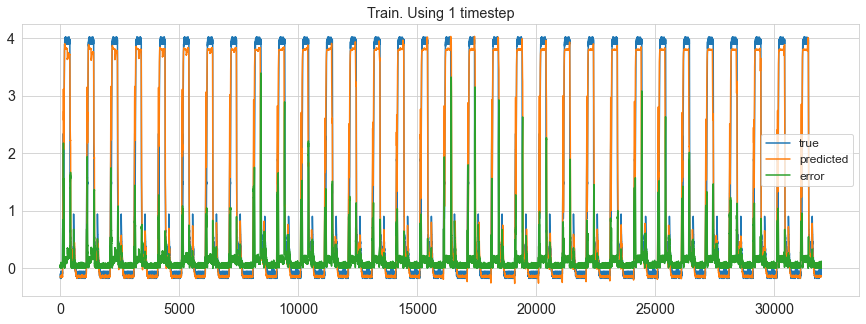

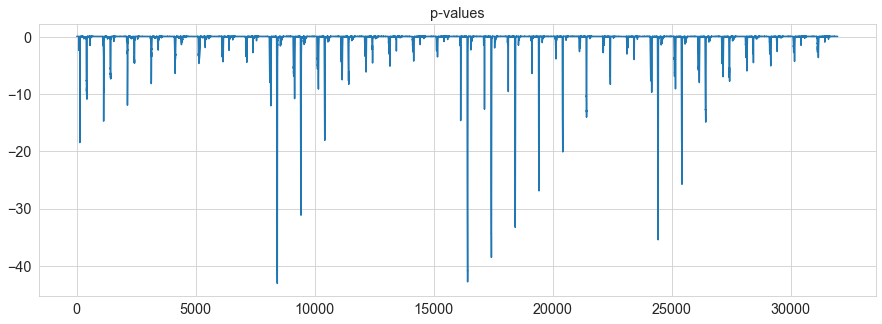

In [27]:
#error vectors
from scipy.stats import norm
from scipy.stats import multivariate_normal

train_error_vectors = np.zeros(np.shape(train_predictions))
n_cols = np.shape(train_predictions)[1]
for i in range(n_cols):
    train_error_vectors[:,i] =  train_true -train_predictions[:,i]

mean = np.mean(train_error_vectors, axis=0)
cov = np.cov(train_error_vectors,rowvar=False)
print(mean)
print(cov)
p_values= multivariate_normal.logpdf(train_error_vectors,mean,cov)

plt.figure(figsize=(15,5))
plt.plot(train_true,label='true')
plt.plot(train_predictions[:,0],label='predicted')
plt.plot(abs(train_true - train_predictions[:,0]),label='error')
plt.title("Train. Using 1 timestep")
plt.legend()

# plt.figure(figsize=(15,5))
# plt.plot(train_true,label='true')
# plt.plot(train_predictions[:,5],label='predicted')
# plt.plot(abs(train_true - train_predictions[:,5]),label='error')
# plt.title("Train. Using 6 timestep")
# plt.legend()

plt.figure(figsize=(15,5))
plt.plot(p_values)
plt.title("p-values")
plt.show()

train_errors_1 = train_true - train_predictions[:,0]

In [28]:
v2_error_vectors = np.zeros(np.shape(validation2_predictions))
for i in range(n_cols):
    v2_error_vectors[:,i] =  validation2_true -validation2_predictions[:,i]
v2_p_values= multivariate_normal.logpdf( v2_error_vectors,mean,cov)
# v2_true_anomalies = np.where(validation2_labels[:,0]==1)
# print "Validation2. Number True Anomalies: %d"%(np.shape(v2_true_anomalies)[1])
# print "Validation2. Location of anomalies: %s"%(v2_true_anomalies)
# print "validation2. True anomalies: %s"%(validation2_true[v2_true_anomalies])
# v2_thresholds =v2_p_values[v2_true_anomalies]
# print "validation2. p-values at true anomalies: %s"%(v2_thresholds)

# print 
test_error_vectors = np.zeros(np.shape(test_predictions))
for i in range(n_cols):
    test_error_vectors[:,i] =  test_true -test_predictions[:,i]
test_p_values= multivariate_normal.logpdf( test_error_vectors,mean,cov)
test_true_anomalies = np.where(test_labels[:,0]==1)
# print "Test. Number True Anomalies in: %d"%(np.shape(test_true_anomalies)[1])
# print "Test. Location of anomalies: %s"%(test_true_anomalies)
# print "Test. True anomalies: %s"%(test_true[test_true_anomalies])
# test_thresholds = test_p_values[test_true_anomalies]
# print "Test. p-values at true anomalies: %s"%(test_thresholds)

[ 107  108  109  110  111  112  113  114  115  116  117  118  119  120
  121  122  123  124  125  126  127  128  129  130  131  132  133  134
  135  136  137  138  139  141  142  170  171  172  173  174  175  176
  177  178  179  180  181  182 1116 1117 1118 1119 1120 1121 1122 1123
 1124 1125 1126 1127 1401 1402 1403 1404 1405 1406 1407 1408 1409 1410
 1411 1412 1413 1414 1415 1416 1417 1418 1419 1420 1421 1422 1423 1424
 1425 1426 1427 1428 1429 1430 1431 1432 1433 1434 1435 1436 1437 1438
 1439 1440 1441 1442 1443 1444 1445 1446 1447 1448 1449 1450 1451 1452
 1453 1454 1455 1456 1457 1458 1459 1460 1461 1462 1463 1464 2149 2150
 2151 2152 2153 2154 2155 2156 2157 2158 2159 2161 2431 2432 2433 2434
 2435 2436 2437 2438 2439 2440 2441 2442 2443 2444 2445 2446 2447 2448
 2449 2450 2451 2452 2453 2454 2455 2456 2457 2458 2459 2460 2461 3401
 3402 3403 3404 3405 3406 3407 3408 3409 3410 3411 3412 3413 3414 3415
 3416 3417 3418 3419 3420 3421 3422 3423 3424 3425 3426 3427 3428 3429
 3430 

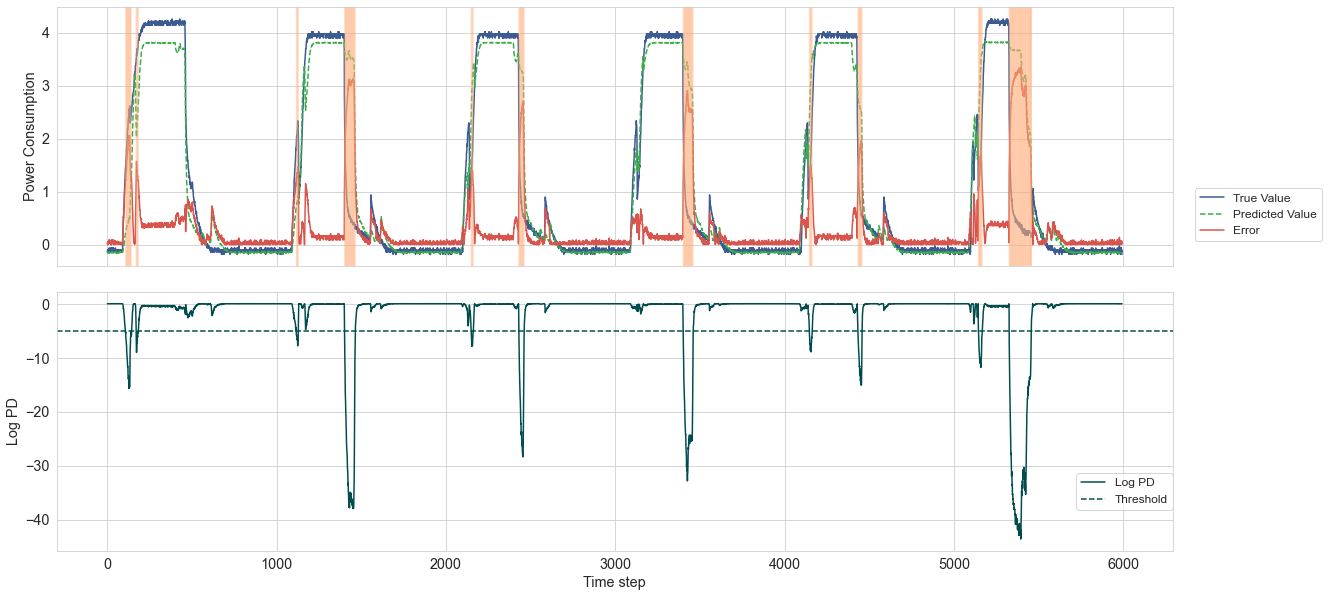

In [31]:
threshold_v2 = -5

f = plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=0.1)

v2_below_threshold = np.where(v2_p_values <= threshold_v2)
ax1 = plt.subplot(211)
ax1.plot(validation2_true,label='True Value',color=sns.xkcd_rgb["denim blue"])
ax1.plot(validation2_predictions[:,0],ls ='dashed',label='Predicted Value',color=sns.xkcd_rgb["medium green"])
ax1.plot(abs(validation2_true - validation2_predictions[:,0]),label='Error',color=sns.xkcd_rgb["pale red"])
for column in v2_below_threshold[0]:
    ax1.axvline(x=column,color=sns.xkcd_rgb["peach"],alpha=.1)
print(v2_below_threshold[0])
ax1.axvline(x=v2_below_threshold[0][-1],color=sns.xkcd_rgb["peach"],alpha=.5)
#for row in v2_true_anomalies:
#    plt.plot(row, validation2_true[row], 'r.', markersize=20.0)
ax1.legend(bbox_to_anchor=(1.02,.3),borderaxespad=0.,frameon=True)
plt.ylabel("Power Consumption")
#plt.title("Validation2. Using 1 timestep")


#plot v2 log PD
ax2 = plt.subplot(212, sharex=ax1)
ax2.plot(v2_p_values,label='Log PD',color=sns.xkcd_rgb["dark teal"])
ax2.axhline(y=threshold_v2,ls='dashed',label='Threshold',color=sns.xkcd_rgb["dark teal"])
ax2.legend(bbox_to_anchor=(1, .3), borderaxespad=0.,frameon=True)
plt.ylabel("Log PD")
#plt.title("Validation2 p-values")

#Set up the xlabel and xtick
#xticklabels = ax1.get_xticklabels() + ax2.get_xticklabels()
xticklabels = ax1.get_xticklabels()
plt.setp(xticklabels, visible=False)
plt.xlabel("Time step")
plt.show()
pp = PdfPages('shuttle_v2_1.pdf')
pp.savefig(f)
pp.close()

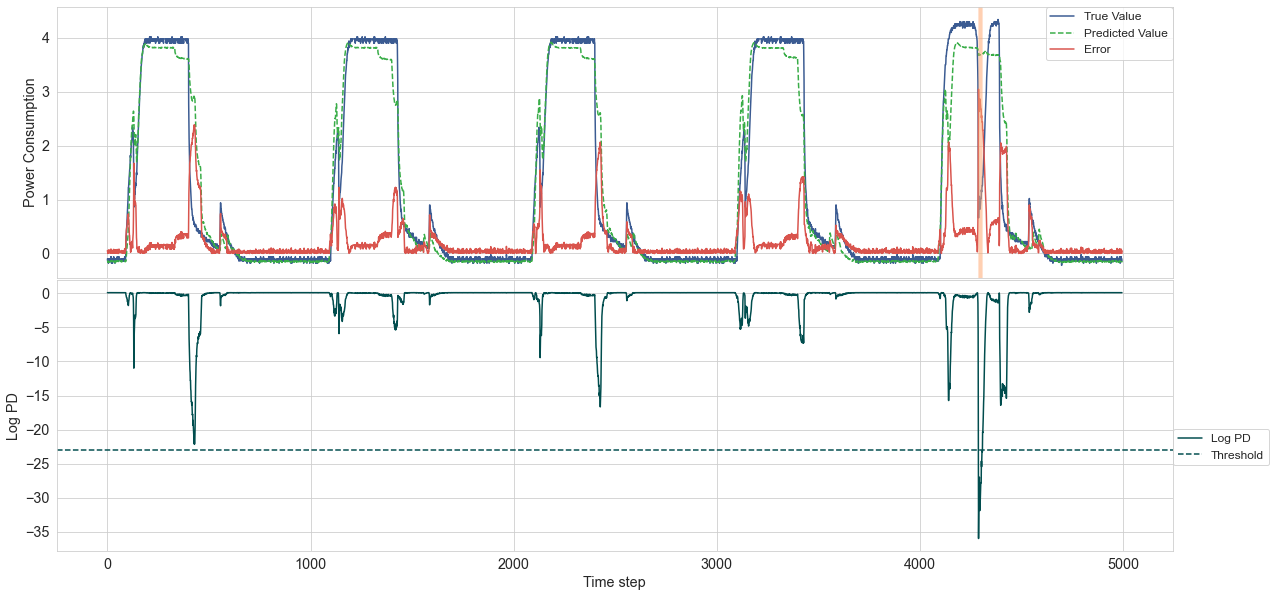

In [33]:
threshold_v2 = -23
test_below_threshold = np.where(test_p_values <= threshold_v2)
#plot test data
f = plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=0.01)

ax1 = plt.subplot(211)
ax1.plot(test_true,label='True Value',color=sns.xkcd_rgb["denim blue"])
ax1.plot(test_predictions[:,0],ls ='dashed',label='Predicted Value',color=sns.xkcd_rgb["medium green"])
ax1.plot(abs(test_true - test_predictions[:,0]),label='Error',color=sns.xkcd_rgb["pale red"])
for column in test_below_threshold[0]:
    ax1.axvline(x=column,color=sns.xkcd_rgb["peach"],alpha=0.1)
#for row in test_true_anomalies:
#    plt.plot(row, test_true[row], 'r.', markersize=20.0)
ax1.legend(bbox_to_anchor=(1, 1), borderaxespad=0.,frameon=True)
plt.ylabel("Power Consumption")
#plt.title("Test. Using 1 timestep")

ax2 = plt.subplot(212, sharex=ax1)
ax2.plot(test_p_values,label='Log PD',color=sns.xkcd_rgb["dark teal"])
ax2.axhline(y=threshold_v2,ls='dashed',label='Threshold',color=sns.xkcd_rgb["dark teal"])
ax2.legend(bbox_to_anchor=(1, .45), borderaxespad=0.,frameon=True)
plt.ylabel("Log PD")
#plt.title("test p-values")

#Set up the xlabel and xtick
#xticklabels = ax1.get_xticklabels() + ax2.get_xticklabels()
xticklabels = ax1.get_xticklabels()
plt.setp(xticklabels, visible=False)
plt.xlabel("Time step")
plt.show()
pp = PdfPages('shuttle_test_1.pdf')
pp.savefig(f)
pp.close()